In [ ]:
'''
%pip install --upgrade pip

%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
'''

'\n%pip install --upgrade pip\n\n%pip install numpy\n%pip install pandas\n%pip install matplotlib\n%pip install seaborn\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

/u/nneoma/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [16]:
df_train['outcome_type'].value_counts()
# class_prior = [0.4952, 0.0094, 0.0310, 0.1493, 0.3151]

outcome_type
Adoption           55044
Transfer           35024
Return to Owner    16599
Euthanasia          3449
Died                1041
Name: count, dtype: int64

In [6]:
## Casey Data Preprocessing ##
df_train.head()
print(df_train['age_upon_intake'].unique())

# drop the rows with missing values in the 'age_upon_intake' column
df_train[df_train['age_upon_intake'].isna()]
df_train = df_train.dropna(subset=['age_upon_intake'])

df_train['sex_upon_intake'].unique()
df_train[df_train['sex_upon_intake'].isna()]['sex_upon_intake'] = 'Unknown'

# Function to convert age strings into years
def convert_age(age_str):
    # Expecting age_str in the format "<number> <unit>"
    # e.g., "2 years", "8 months", "3 weeks", "15 days"
    parts = age_str.split()
    if len(parts) != 2:
        return None
    try:
        num = float(parts[0])
    except ValueError:
        return None
    unit = parts[1].lower()
    if "year" in unit:
        return num
    elif "month" in unit:
        return num / 12
    elif "week" in unit:
        return num / 52
    elif "day" in unit:
        return num / 365
    else:
        return None

df_train['age_upon_intake'] = df_train['age_upon_intake'].apply(age_in_months)

df_train[df_train['age_upon_intake'] < 0].head()



['8 years' '11 months' '2 years' '6 years' '6 months' '4 weeks' '5 months'
 '4 years' '1 month' '14 years' '2 weeks' '1 week' '2 months' '18 years'
 '9 years' '4 months' '1 day' '1 year' '3 years' '5 years' '8 months'
 '6 days' '7 years' '3 months' '12 years' '3 weeks' '9 months' '10 years'
 '10 months' '7 months' '0 years' '1 weeks' '5 days' '17 years' '2 days'
 '11 years' '4 days' '3 days' '15 years' '13 years' '5 weeks' '16 years'
 '19 years' '-1 years' '20 years' '-4 years' '22 years' nan '24 years']


/tmp/ipykernel_978830/3408084326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train['sex_upon_intake'].isna()]['sex_upon_intake'] = 'Unknown'


,id,name,intake_time,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,outcome_time,date_of_birth,outcome_type
6828,A725472,Rascal,02/26/2019 11:25:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,-12.0,Chihuahua Shorthair Mix,White/Brown,07/24/2016 03:54:00 PM,04/29/2020,Adoption
30959,A783723,Pina,11/05/2018 11:00:00 AM,3108 Crownover Street in Austin (TX),Stray,Normal,Cat,Intact Female,-48.0,Domestic Shorthair,White/Orange,11/12/2018 11:53:00 AM,02/07/2023,Adoption
44133,A797495,Ace,06/14/2019 11:34:00 AM,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,-12.0,Cairn Terrier,Black/Tan,06/17/2021 11:46:00 AM,12/16/2020,Transfer
70654,A753893,Chato,06/26/2015 04:30:00 PM,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-12.0,American Bulldog Mix,White/Brown,09/10/2017 12:00:00 AM,07/12/2016,Transfer


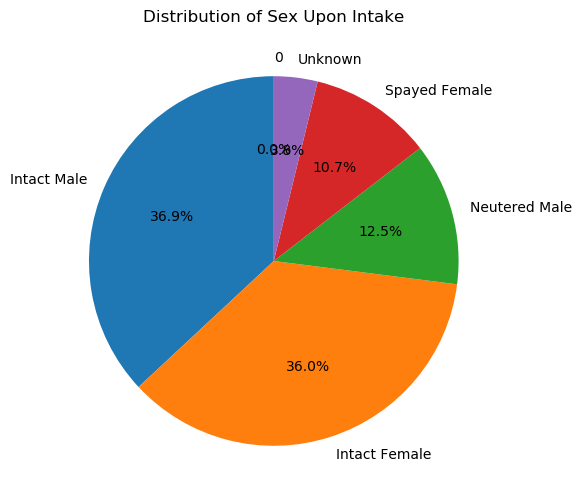

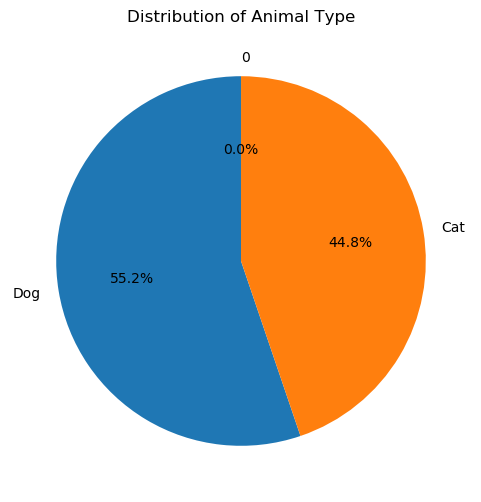

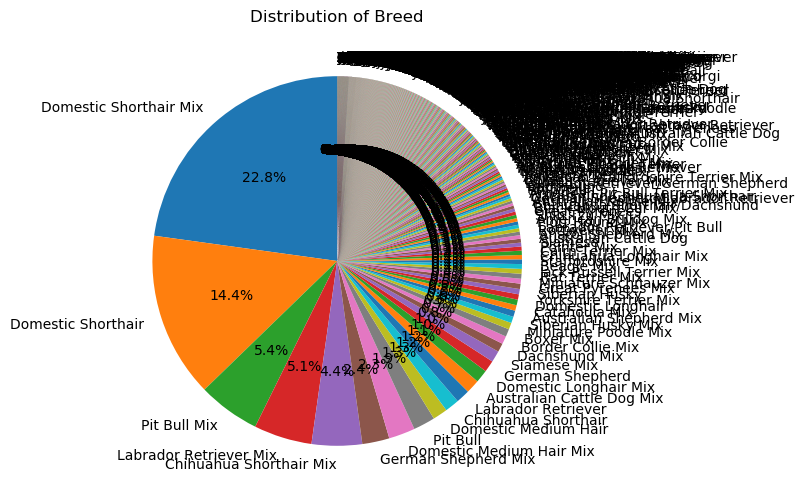

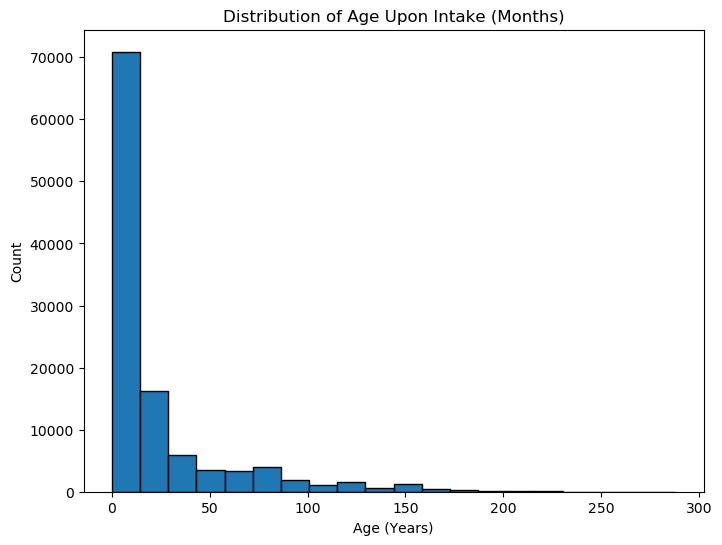

In [8]:
# set negative ages to 0
df_train[df_train['age_upon_intake'] < 0] = 0

# Pie chart for 'sex_upon_intake'
plt.figure(figsize=(6,6))
df_train['sex_upon_intake'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sex Upon Intake")
plt.ylabel('')
plt.show()

# Pie chart for 'animal_type'
plt.figure(figsize=(6,6))
df_train['animal_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Animal Type")
plt.ylabel('')
plt.show()

# Pie chart for 'breed'
plt.figure(figsize=(6,6))
df_train['breed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Breed")
plt.ylabel('')
plt.show()

# Bar chart (histogram) for 'age_in_years'
plt.figure(figsize=(8,6))
plt.hist(df_train['age_upon_intake'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of Age Upon Intake (Months)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

In [9]:
df_cat = df_train[df_train['animal_type'] == 'Cat']

In [11]:
df_cat['breed'].value_counts()

breed
Domestic Shorthair Mix                     25361
Domestic Shorthair                         16045
Domestic Medium Hair Mix                    2564
Domestic Medium Hair                        1436
Domestic Longhair Mix                       1254
                                           ...  
Siamese/Angora                                 1
Domestic Shorthair/Domestic Medium Hair        1
Scottish Fold                                  1
Scottish Fold Mix                              1
Turkish Angora                                 1
Name: count, Length: 102, dtype: int64

In [1]:
def age_in_months(age_str):    
    """
    Convert age strings to months.
    Expected format: "<number> <unit>" e.g., "2 years", "8 months", "3 weeks", "15 days"
    """
    if not isinstance(age_str, str):
        return None

    parts = age_str.split()
    if len(parts) != 2:
        return None

    try:
        num = float(parts[0])
    except ValueError:
        return None

    unit = parts[1].lower()
    if "year" in unit:
        return num * 12
    elif "month" in unit:
        return num
    elif "week" in unit:
        return num / 4  # approx. weeks in a month
    elif "day" in unit:
        return num / 30.0  # approx. days in a month
    else:
        return None


In [19]:
# Count the frequency of each breed
breed_counts = df_train['breed'].value_counts()

rare_breeds = breed_counts[breed_counts <= 3].index

# Filter the DataFrame for records with these rare breeds
rare_records = df_train[df_train['breed'].isin(rare_breeds)]

# Get the number of such records
rare_count = rare_records.shape[0]
print("Number of rare breeds:", rare_count)

Number of rare breeds: 2329


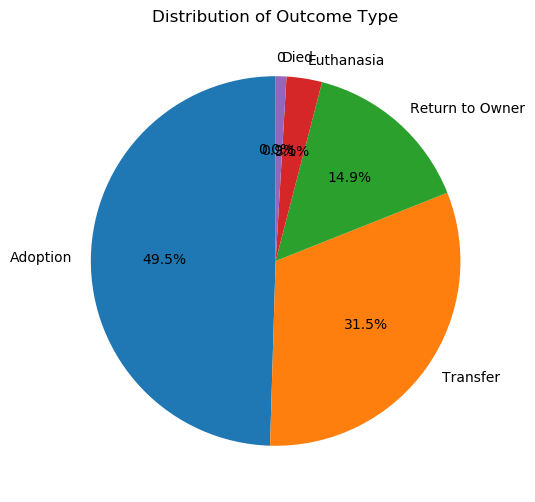

In [20]:
# Pie chart for 'outcome_type'
plt.figure(figsize=(6,6))
df_train['outcome_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Outcome Type")
plt.ylabel('')
plt.show()

In [21]:
df_train.describe()

,age_upon_intake
count,111156.000000
mean,1.906149
std,2.865817
min,0.000000
25%,0.083333
50%,1.000000
75%,2.000000
max,24.000000


In [22]:
## Data Preprocessing ##
'''
print('records with missing names:', df_train['name'].isna().sum())  

print('records that are blank or has numbers:', non_alpha_values.sum()) # does not wrok but you get the idea. fix pls
'''

"\nprint('records with missing names:', df_train['name'].isna().sum())  \n\nprint('records that are blank or has numbers:', non_alpha_values.sum()) # does not wrok but you get the idea. fix pls\n"

In [23]:
# Rebecca's slay data exploration block /ᐠ - ˕ -マ intake time, color, outcome time, date of birth
null_dob_count = df_train["date_of_birth"].isnull().all().sum()

print(f"Number of columns with all null values: {null_dob_count}")
train_sample = df_train.copy(deep=True)

# feature engineering 

# calculating DAYS in shelter
train_sample["days_in_shelter"] = (pd.to_datetime(train_sample["outcome_time"]) - pd.to_datetime(train_sample["intake_time"])).dt.total_seconds() / 86400
# get rid of invalid rows
train_sample = train_sample.dropna(subset=["intake_time", "outcome_time"])
train_sample = train_sample[train_sample["intake_time"] < train_sample["outcome_time"]]

# calculating the primary color of the animal in both cats and dogs 
train_sample["primary_color"] = train_sample["color"].str.split("/, ").str[0]

Number of columns with all null values: 0


/tmp/ipykernel_892281/2106591960.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_sample["days_in_shelter"] = (pd.to_datetime(train_sample["outcome_time"]) - pd.to_datetime(train_sample["intake_time"])).dt.total_seconds() / 86400


ValueError: time data "0" doesn't match format "%m/%d/%Y %I:%M:%S %p", at position 6828. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

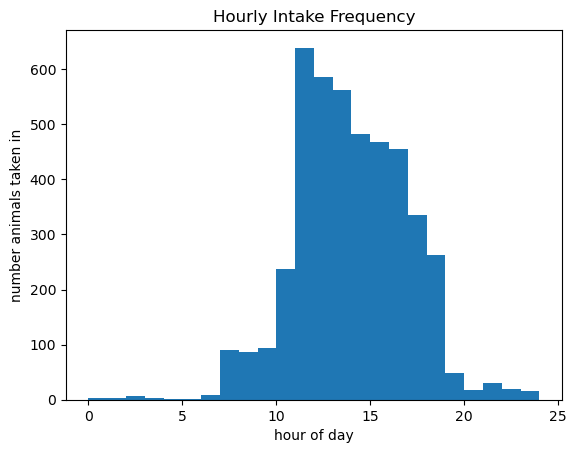

In [ ]:
# what time of day are animals brought in? 
train_sample['intake_hour'] = pd.to_datetime(df_train['intake_time'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.hour
plt.hist(train_sample["intake_hour"], bins=24, range=(0, 24))
plt.xlabel("hour of day")
plt.ylabel("number animals taken in")
plt.title("Hourly Intake Frequency") 
plt.show()

C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\2410007291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats_sample["primary_color"] = cats_sample["primary_color"].apply(lambda x: x if x in top_colors else "Other")


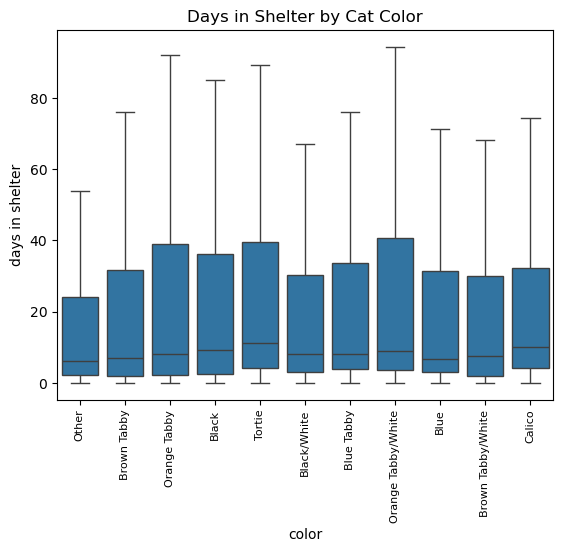

In [ ]:
# CATS!
cats_sample = train_sample[train_sample["animal_type"] == "Cat"]

# narrow down to top colors for better visualization
top_colors = cats_sample["primary_color"].value_counts().nlargest(10).index
cats_sample["primary_color"] = cats_sample["primary_color"].apply(lambda x: x if x in top_colors else "Other")

# get rid of invalid ones 
cats_sample = cats_sample[cats_sample["days_in_shelter"] > 0]

# plot!
sns.boxplot(data=cats_sample, x="primary_color", y="days_in_shelter", showfliers=False)
plt.xlabel("color")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("days in shelter")
plt.title("Days in Shelter by Cat Color")
plt.show()

C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\2383781449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_sample["primary_color"] = dogs_sample["primary_color"].apply(lambda x: x if x in top_colors else "Other")


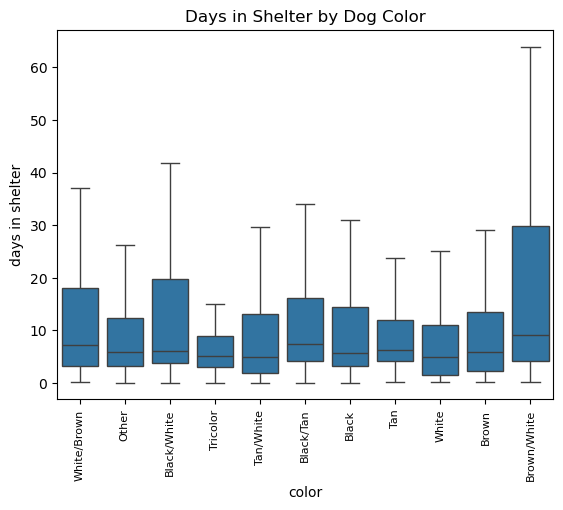

In [ ]:
# dogs
dogs_sample = train_sample[train_sample["animal_type"] == "Dog"]

# only save top colors
top_colors = dogs_sample["primary_color"].value_counts().nlargest(10).index
dogs_sample["primary_color"] = dogs_sample["primary_color"].apply(lambda x: x if x in top_colors else "Other")

# getting rid of invalid ones 
dogs_sample = dogs_sample[dogs_sample["days_in_shelter"] > 0]

sns.boxplot(data=dogs_sample, x="primary_color", y="days_in_shelter", showfliers=False)
plt.xlabel("color")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("days in shelter")
plt.title("Days in Shelter by Dog Color")
plt.show()

C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\623366566.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adopted_cats["age_when_adopted"] = (pd.to_datetime(adopted_cats["outcome_time"]) - pd.to_datetime(adopted_cats["date_of_birth"])).dt.days / 365
C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\623366566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_cats["age_when_adopted"] = (pd.to_datetime(adopted_cats["outcome_time"]) - pd.to_datetime(adopted_cats["date_of_birth"])).dt.days / 365
C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\623366566.py:16: SettingWithCopyWarning: 
A value is t

([<matplotlib.patches.Wedge at 0x1ee88b9c830>,
 [Text(-0.957733425945459, 0.541060703458285, 'Kitten'),
  Text(0.9258578157526969, -0.5939590095365549, 'Adult'),
  Text(1.098266227808133, -0.06173566923662797, 'Senior')],
 [Text(-0.5224000505157048, 0.2951240200681554, '83.6%'),
  Text(0.5050133540469255, -0.32397764156539355, '14.6%'),
  Text(0.5990543060771634, -0.03367400140179707, '1.8%')])

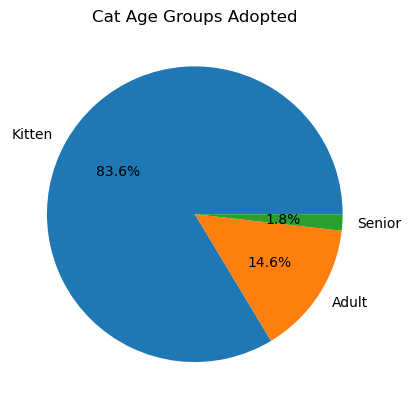

In [ ]:
# cats adoptive sample
adopted_cats = cats_sample[cats_sample["outcome_type"] == "Adoption"]

# cat age groups
adopted_cats["age_when_adopted"] = (pd.to_datetime(adopted_cats["outcome_time"]) - pd.to_datetime(adopted_cats["date_of_birth"])).dt.days / 365

def cat_age_groups(age):
    if pd.isna("age"):  
        return "Unknown"
    elif age > 10:
        return "Senior"
    elif age > 2:
        return "Adult"
    return "Kitten"

adopted_cats["age_group_when_adopted"] = adopted_cats["age_when_adopted"].apply(cat_age_groups)

adopt_age_group_counts = adopted_cats["age_group_when_adopted"].value_counts()

plt.title("Cat Age Groups Adopted")
plt.pie(adopt_age_group_counts, labels=adopt_age_group_counts.index, autopct='%1.1f%%')

C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\722849970.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adopted_dogs["age_when_adopted"] = (pd.to_datetime(adopted_dogs["outcome_time"]) - pd.to_datetime(adopted_dogs["date_of_birth"])).dt.days / 365
C:\Users\nneom\AppData\Local\Temp\ipykernel_25572\722849970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_dogs["age_when_adopted"] = (pd.to_datetime(adopted_dogs["outcome_time"]) - pd.to_datetime(adopted_dogs["date_of_birth"])).dt.days / 365


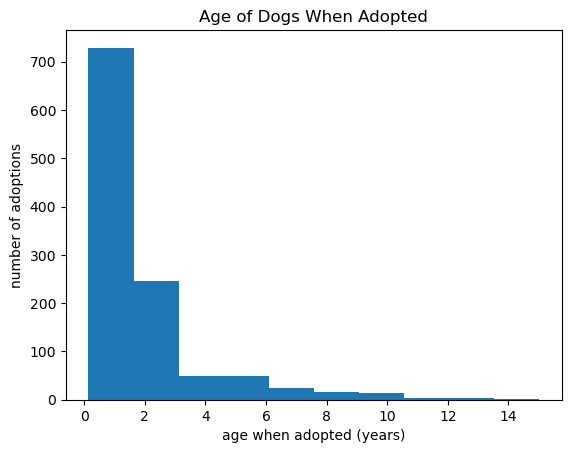

Text(0.5, 1.0, 'Age of Cats When Adopted')

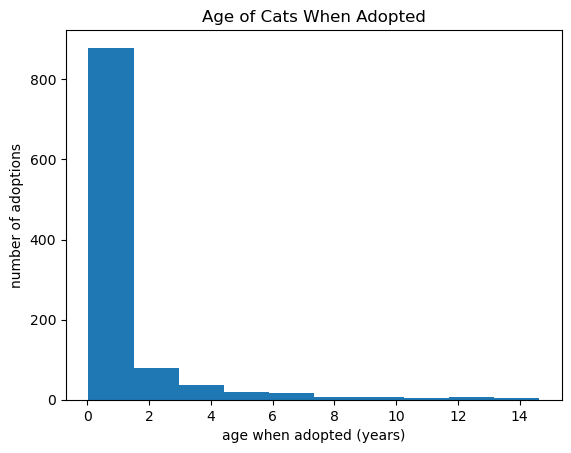

In [ ]:
# age in MONTHS that are most popular for adoption - cats and dogs 
adopted_dogs = dogs_sample.dropna(subset="outcome_type")
adopted_dogs = dogs_sample[dogs_sample["outcome_type"] == "Adoption"]
adopted_dogs["age_when_adopted"] = (pd.to_datetime(adopted_dogs["outcome_time"]) - pd.to_datetime(adopted_dogs["date_of_birth"])).dt.days / 365

plt.hist(adopted_dogs["age_when_adopted"])
plt.xlabel("age when adopted (years)")
plt.ylabel("number of adoptions")
plt.title("Age of Dogs When Adopted")
plt.show()

plt.hist(adopted_cats["age_when_adopted"])
plt.xlabel("age when adopted (years)")
plt.ylabel("number of adoptions")
plt.title("Age of Cats When Adopted")

intake_type
Stray                 82159
Owner Surrender       21446
Public Assist          6131
Abandoned              1233
Euthanasia Request      182
0                         4
Wildlife                  1
Name: count, dtype: int64
0


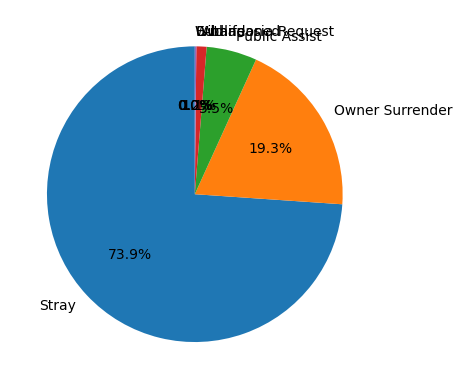

In [ ]:
# Nneoma's data visualation

# I am going to look at the Intake Type

print(df_train['intake_type'].value_counts())
plt.pie(df_train['intake_type'].value_counts(), labels=df_train['intake_type'].value_counts().index, autopct='%1.1f%%', startangle=90)

print(df_train['intake_type'].isna().sum())

In [ ]:
df_cat = df_train[df_train['animal_type'] == 'Cat']
df_dog = df_train[df_train['animal_type'] == 'Dog']

In [ ]:
df_cat['breed'].value_counts()

breed
Domestic Shorthair Mix                     25361
Domestic Shorthair                         16045
Domestic Medium Hair Mix                    2564
Domestic Medium Hair                        1436
Domestic Longhair Mix                       1254
                                           ...  
Siamese/Angora                                 1
Domestic Shorthair/Domestic Medium Hair        1
Scottish Fold                                  1
Scottish Fold Mix                              1
Turkish Angora                                 1
Name: count, Length: 102, dtype: int64

CAT INTAKE TYPES
intake_type
Stray                 39062
Owner Surrender        9142
Public Assist          1009
Abandoned               523
Euthanasia Request       42
Name: count, dtype: int64


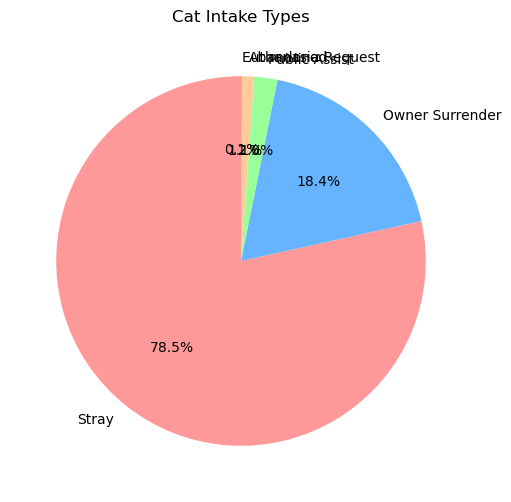

0
DOG INTAKE TYPES
intake_type
Stray                 43097
Owner Surrender       12304
Public Assist          5122
Abandoned               710
Euthanasia Request      140
Wildlife                  1
Name: count, dtype: int64


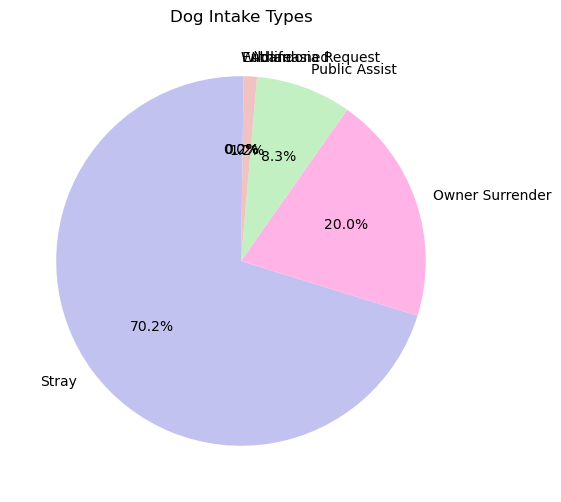

0


In [ ]:
# Define custom color palettes
cat_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
dog_colors = ['#c2c2f0','#ffb3e6','#c2f0c2','#f0c2c2']

# CAT INTAKE TYPES
print('CAT INTAKE TYPES')
print(df_cat['intake_type'].value_counts())
plt.figure(figsize=(6, 6))  # Optional: control pie size
plt.pie(df_cat['intake_type'].value_counts(), 
        labels=df_cat['intake_type'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=cat_colors)
plt.title('Cat Intake Types')
plt.show()

print(df_cat['intake_type'].isna().sum())


# DOG INTAKE TYPES
print('DOG INTAKE TYPES')
print(df_dog['intake_type'].value_counts())
plt.figure(figsize=(6, 6))
plt.pie(df_dog['intake_type'].value_counts(), 
        labels=df_dog['intake_type'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=dog_colors)
plt.title('Dog Intake Types')
plt.show()

print(df_dog['intake_type'].isna().sum())

intake_condition
Normal        95005
Injured        6394
Sick           4295
Nursing        2957
Neonatal       1240
Aged            373
Medical         298
Other           247
Pregnant        111
Feral           104
Med Attn         48
Behavior         42
Unknown          12
Neurologic       10
Med Urgent        7
Parvo             5
0                 4
Space             2
Agonal            1
Congenital        1
Name: count, dtype: int64
0


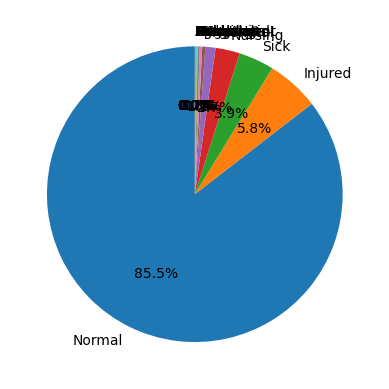

In [ ]:
# INTAKE CONDITION

df_train['intake_condition'].unique() # 
print(df_train['intake_condition'].value_counts())
plt.pie(df_train['intake_condition'].value_counts(), labels=df_train['intake_condition'].value_counts().index, autopct='%1.1f%%', startangle=90)

print(df_train['intake_condition'].isna().sum())

CAT INTAKE CONDITIONS
intake_condition
Normal        41031
Injured        3072
Sick           2338
Nursing        2018
Neonatal        923
Medical         103
Feral            95
Other            77
Aged             58
Pregnant         29
Med Attn         17
Unknown           5
Neurologic        5
Med Urgent        2
Space             2
Behavior          2
Agonal            1
Name: count, dtype: int64


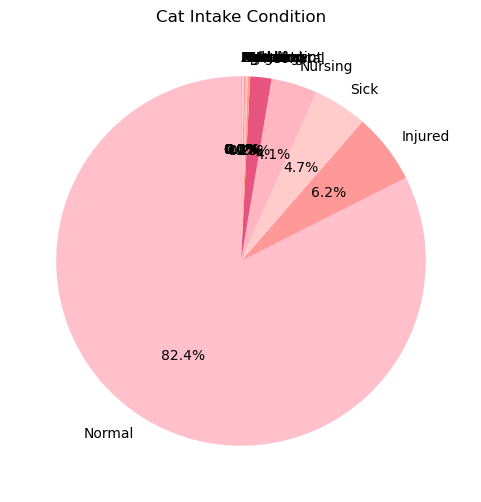

Missing: 0
DOG INTAKE CONDITIONS
intake_condition
Normal        53974
Injured        3322
Sick           1957
Nursing         939
Neonatal        317
Aged            315
Medical         195
Other           170
Pregnant         82
Behavior         40
Med Attn         31
Feral             9
Unknown           7
Parvo             5
Neurologic        5
Med Urgent        5
Congenital        1
Name: count, dtype: int64


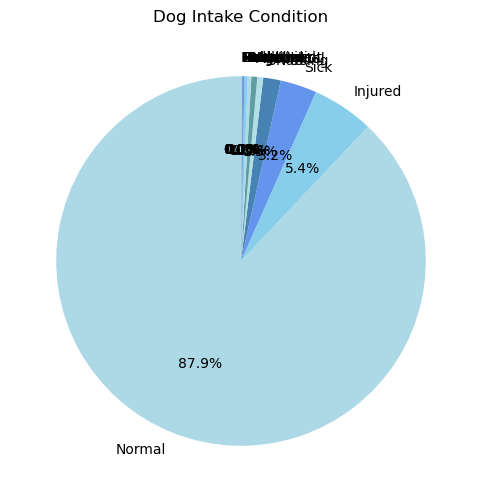

Missing: 0


In [ ]:
# SEGMENTED BY ANIMAL TYPE

# Define custom color palettes
cat_colors = ['#ffc0cb', '#ff9999', '#ffcccb', '#ffb6c1', '#e75480', '#ffa07a']
dog_colors = ['#add8e6', '#87ceeb', '#6495ed', '#4682b4', '#b0e0e6', '#5f9ea0']

# SEGMENTED BY ANIMAL TYPE

# CAT INTAKE CONDITION
print("CAT INTAKE CONDITIONS")
print(df_cat['intake_condition'].value_counts())
plt.figure(figsize=(6, 6))
plt.pie(df_cat['intake_condition'].value_counts(),
        labels=df_cat['intake_condition'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=cat_colors)
plt.title('Cat Intake Condition')
plt.show()
print("Missing:", df_cat['intake_condition'].isna().sum())

# DOG INTAKE CONDITION
print("DOG INTAKE CONDITIONS")
print(df_dog['intake_condition'].value_counts())
plt.figure(figsize=(6, 6))
plt.pie(df_dog['intake_condition'].value_counts(),
        labels=df_dog['intake_condition'].value_counts().index,  # corrected this line!
        autopct='%1.1f%%',
        startangle=90,
        colors=dog_colors)
plt.title('Dog Intake Condition')
plt.show()
print("Missing:", df_dog['intake_condition'].isna().sum())

In [ ]:
#  Intake Type v Intake Condition

pd.crosstab(df_train['intake_type'], df_train['intake_condition'])

intake_condition,0,Aged,Agonal,Behavior,Congenital,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Neurologic,Normal,Nursing,Other,Parvo,Pregnant,Sick,Space,Unknown
intake_type,,,,,,,,,,,,,,,,,,,,
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Abandoned,0,0,0,0,0,0,19,0,0,12,74,0,1017,61,1,0,0,47,2,0
Euthanasia Request,0,29,0,0,0,0,12,0,1,0,0,0,65,0,1,0,0,74,0,0
Owner Surrender,0,85,1,16,0,6,523,12,2,45,102,1,19492,204,75,0,20,858,0,4
Public Assist,0,30,0,12,0,1,155,0,0,31,27,0,5592,96,36,0,4,145,0,2
Stray,0,229,0,14,1,97,5685,36,4,210,1037,9,68839,2596,134,5,87,3170,0,6
Wildlife,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


These are the Intake Types Among the Animals Found Outside Jurisdiction intake_type
Owner Surrender       539
Stray                 327
Public Assist         169
Abandoned              13
Euthanasia Request      1
Name: count, dtype: int64 

These are the Intake Conditions Among the Animals Found Outside Jurisdiction intake_condition
Normal        932
Injured        47
Sick           32
Nursing        17
Neonatal       15
Medical         3
Pregnant        1
Aged            1
Neurologic      1
Name: count, dtype: int64 

cities animals were found city_name
Austin (TX)             90573
Travis (TX)             12741
Manor (TX)               2322
Valle (TX)               1671
Pflugerville (TX)        1462
Outside Jurisdiction     1047
Leander (TX)              257
Vista (TX)                161
Park (TX)                 125
Lakeway (TX)              118
Creedmoor (TX)            118
Jonestown (TX)             98
Ridge (TX)                 77
Hays (TX)                  68
Rock (TX)         

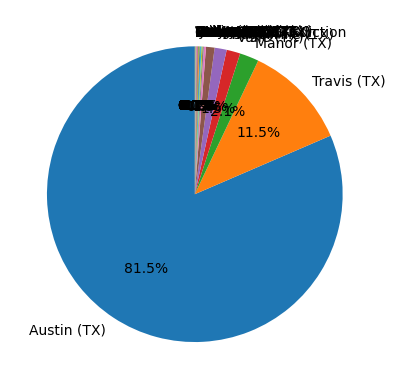

intake_type,0,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
city_name,,,,,,,
,4,0,0,0,0,0,0
Austin (TX),0,1093,162,16964,4945,67408,1
Bastrop (TX),0,0,0,25,0,32,0
Blanco (TX),0,0,0,1,0,0,0
Burnet (TX),0,0,0,4,0,1,0
Caldwell (TX),0,0,0,4,2,4,0
Cave (TX),0,0,0,15,5,32,0
Creedmoor (TX),0,0,0,23,4,91,0
Hays (TX),0,1,0,30,5,32,0


In [ ]:
# Found Location
# df_train.sample(50)

# number of rows that did NOT find the pet in Austin, TX
df_no_austin = df_train[~df_train['found_location'].str.contains('Austin', case=False, na=False)]
df_no_austin.shape[0]

# these are the rows that were found outside juridiction
df_outside = df_no_austin[df_no_austin['found_location'].str.contains('Outside', case=False, na=False)]
print('These are the Intake Types Among the Animals Found Outside Jurisdiction', df_outside['intake_type'].value_counts(), "\n")
print('These are the Intake Conditions Among the Animals Found Outside Jurisdiction', df_outside['intake_condition'].value_counts(), "\n")

pd.crosstab(df_outside['intake_type'], df_outside['intake_condition'])


# looking at the city names - will not keep city names
df_train['city_name'] = df_train['found_location'].apply(
    lambda x: ' '.join(x.split()[-2:]) if isinstance(x, str) else ''
)
print('cities animals were found', df_train['city_name'].value_counts())
plt.pie(df_train['city_name'].value_counts(), labels=df_train['city_name'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()
pd.crosstab(df_train['city_name'], df_train['intake_type'])

In [ ]:
# MORE FOUND LOCATION (wanted to make it neater)
df_i35 = df_train[df_train['found_location'].str.contains(' 35 ', case=False, na=False)]
print('These are the Intake Types Among the Animals Found on the Interstate Hwy 35', df_i35['intake_type'].value_counts(), "\n")
print('These are the Intake Conditions Among the Animals on the Interstate Hwy 35', df_i35['intake_condition'].value_counts(), "\n")

In [ ]:
import re

def extract_street(location):
    if pd.isna(location):
        return None
    
    # Remove anything like "in Austin (TX)" or "Austin (TX)" at the end
    cleaned = re.sub(r'in Austin.*|Austin\s*\(TX\).*', '', location, flags=re.IGNORECASE).strip()
    
    # Remove leading numbers (e.g. "3522 " from "3522 East MLK Blvd")
    cleaned = re.sub(r'^\d+\s+', '', cleaned)
    
    return cleaned if cleaned else None



In [ ]:
df_train['street_name'] = df_train['found_location'].apply(extract_street)

# Set pandas options to display the entire content of each column
pd.set_option('display.max_colwidth', None)  # No truncation for strings
pd.set_option('display.max_rows', None)  # Show all rows (if not too many)


df_train['street_name'] = df_train['found_location'].apply(extract_street)
print(df_train['street_name'].value_counts())

In [ ]:
# Found Location by Highways
df_hwy = df_train[(df_train['found_location'].str.contains('evander', case=False, na=False)) | (df_train['found_location'].str.contains(' 35 ', case=False, na=False)) | (df_train['found_location'].str.contains('opac', case=False, na=False))]

print(df_hwy.shape[0])
print('These are the Intake Types Among the Animals Found on Highways', df_hwy['intake_type'].value_counts(), "\n")
print('These are the Intake Conditions Among the Animals on Highways', df_hwy['intake_condition'].value_counts(), "\n")

print("These are the number of Pets found on Street Corners")
df_train[(df_train['found_location'].str.contains('and', case=False, na=False)) | (df_train['found_location'].str.contains('&', case=False, na=False)) | (df_train['found_location'].str.contains('And', case=False, na=False))].shape[0]


In [ ]:

print("Number of Names with a * In It")
print(df_train[df_train['name'].str.contains(r'\*', na=False)].shape[0])


print('Number of Names with a Parentheses in It')
df_train[df_train['name'].str.contains(r'\(', na=False)]

Number of Names That Have More Than One Word


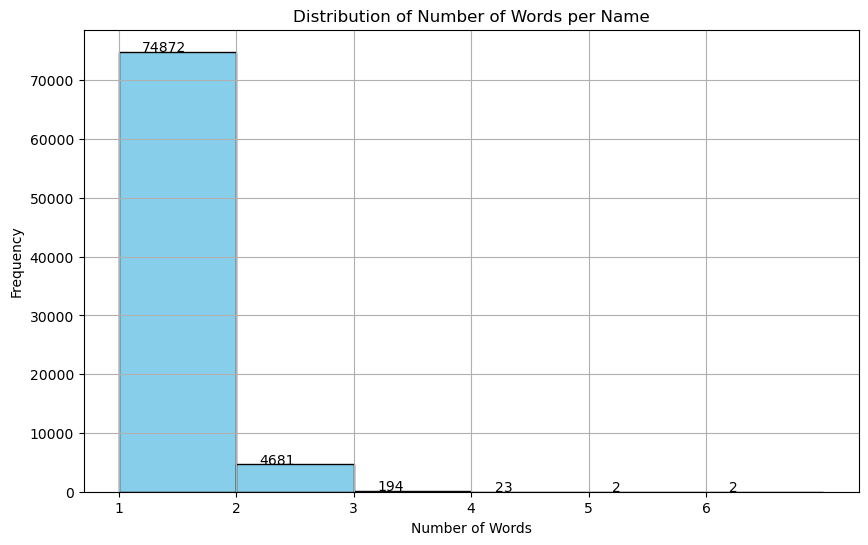

In [ ]:
print('Number of Names That Have More Than One Word')
df_train['num_words'] = df_train['name'].str.split().str.len() # takes a long time to dp
df_train


plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_train['num_words'], bins=range(int(df_train['num_words'].min()), int(df_train['num_words'].max()) + 2), color='skyblue', edgecolor='black')

# Add numbers on top of the bars
for count, bin_left in zip(counts, bins):
    if count > 0:  # Only add text for bins that have counts
        plt.text(bin_left + 0.2, count, str(int(count)), fontsize=10, color='black')

# Set integer labels on x-axis
plt.xticks(range(int(df_train['num_words'].min()), int(df_train['num_words'].max()) + 1))

plt.title('Distribution of Number of Words per Name')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Finally onto name
food  = pd.read_csv('generic-food.csv')
food = food.drop(food.columns[1:], axis=1)
food.columns

matching_names = df_train[df_train['name'].apply(lambda x: any(food_name.lower() in str(x).lower() for food_name in food['FOOD NAME']))]

In [ ]:
# Count the number of matching names
matching_names.shape[0]
print('These are the names that also match with the food CSV')
print(matching_names['name'].value_counts(), "\n")

print('These are the animals that have a number in them')
print(df_train['name'][df_train['name'].str.contains(r'[^a-zA-Z ()*]', na=False)], "\n")


In [ ]:
pd.crosstab(df_train['intake_type'], df_train['outcome_type'])

outcome_type,Adoption,Died,Euthanasia,Return to Owner,Transfer
intake_type,,,,,
Abandoned,777,5,8,112,331
Euthanasia Request,8,3,143,7,21
Owner Surrender,13870,148,587,1158,5684
Public Assist,1136,27,200,3896,872
Stray,39253,858,2511,11425,28116
Wildlife,0,0,0,1,0


In [ ]:
#df_train.sample(15)
#print('These are the animals that have a number in them')
df_train[df_train['name'].str.contains(r'[^a-zA-Z ().*-]', na=False)]
df_train['']

In [ ]:
pd.crosstab(df_train['num_words'], df_train['outcome_type'])

outcome_type,Adoption,Died,Euthanasia,Return to Owner,Transfer
num_words,,,,,
1.0,42936,374,1413,15092,15057
2.0,2277,21,79,716,1588
3.0,115,1,2,21,55
4.0,7,0,0,3,13
5.0,0,1,0,0,1
6.0,2,0,0,0,0


In [ ]:
pd.crosstab(df_train['intake_condition'] == 'Sick', df_train['outcome_type'])

outcome_type,Adoption,Died,Euthanasia,Return to Owner,Transfer
intake_condition,,,,,
False,53834,864,2783,16312,33069
True,1210,177,666,287,1955


In [ ]:
df_train[df_train['intake_condition'] == 'Neurologic']

,id,name,intake_time,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,outcome_time,date_of_birth,outcome_type,num_words
26332,A882255,NaN,06/02/2023 02:32:00 PM,Bedford Street And Rosewood Avenue in Austin (TX),Stray,Neurologic,Dog,Intact Female,3 months,Rat Terrier Mix,White/Black,06/02/2023 06:18:00 PM,02/02/2023,Transfer,NaN
35449,A876353,*Andi,03/13/2023 04:16:00 PM,Burnet Road And 2222 in Travis (TX),Stray,Neurologic,Dog,Spayed Female,1 year,Carolina Dog Mix,Brown,10/13/2023 03:10:00 PM,03/13/2022,Transfer,1.0
39048,A870636,Dakota,12/09/2022 04:50:00 PM,Octavia Dr And Pinewalk Dr in Travis (TX),Stray,Neurologic,Dog,Intact Female,1 month,German Shepherd,Black/Brown,12/13/2022 04:06:00 PM,10/09/2022,Adoption,1.0
53944,A900024,NaN,03/13/2024 03:20:00 PM,Lago Vista (TX),Owner Surrender,Neurologic,Cat,Intact Female,3 weeks,Domestic Shorthair,Brown Tabby,03/13/2024 05:51:00 PM,02/20/2024,Transfer,NaN
55437,A907260,*Peter,06/13/2024 12:11:00 PM,N Lamar And Payton Ln in Travis (TX),Stray,Neurologic,Dog,Intact Male,1 year,Chihuahua Shorthair,Tan,08/01/2024 12:03:00 PM,06/13/2023,Adoption,1.0
62983,A879391,A879391,04/25/2023 12:02:00 PM,Outside Jurisdiction,Stray,Neurologic,Dog,Intact Female,5 months,Rottweiler,Black/Tan,04/27/2023 02:45:00 PM,11/18/2022,Transfer,1.0
68189,A883867,NaN,06/24/2023 04:01:00 PM,3711 Caldwell Lane in Travis (TX),Stray,Neurologic,Cat,Intact Female,1 month,Domestic Shorthair,Blue Tabby,06/25/2023 07:09:00 PM,04/24/2023,Transfer,NaN
85998,A863983,285 Grams,08/18/2022 04:10:00 PM,1102 E 2Nd in Austin (TX),Stray,Neurologic,Cat,Intact Male,3 weeks,Domestic Shorthair,Black/White,08/18/2022 06:21:00 PM,07/27/2022,Transfer,2.0
92559,A881446,NaN,05/22/2023 03:14:00 PM,1401 E Rundberg Ln in Austin (TX),Stray,Neurologic,Cat,Intact Male,2 weeks,Domestic Shorthair,Brown Tabby,05/22/2023 05:12:00 PM,05/04/2023,Transfer,NaN
100912,A883866,NaN,06/24/2023 04:01:00 PM,3711 Caldwell Lane in Travis (TX),Stray,Neurologic,Cat,Intact Female,1 month,Domestic Shorthair,Blue Tabby,06/25/2023 07:09:00 PM,04/24/2023,Transfer,NaN


In [ ]:
# Filter for only dogs and cats
df_filtered = df_train[df_train['animal_type'].isin(['Dog', 'Cat'])].copy(deep=True)

# Count outcomes per animal type
outcome_counts = df_filtered.groupby(['animal_type', 'outcome_type']).size().reset_index(name='count')

# Calculate total outcomes per animal type
totals = outcome_counts.groupby('animal_type')['count'].transform('sum')

# Add percentage column
outcome_counts['percentage'] = (outcome_counts['count'] / totals * 100).round(2)

# Sort for nicer output (optional)
outcome_counts = outcome_counts.sort_values(['animal_type', 'percentage'], ascending=[True, False])

# Print result
print(outcome_counts)


  animal_type     outcome_type  count  percentage
0         Cat         Adoption  24894       50.01
4         Cat         Transfer  20128       40.44
3         Cat  Return to Owner   2108        4.23
2         Cat       Euthanasia   1911        3.84
1         Cat             Died    737        1.48
5         Dog         Adoption  30148       49.12
9         Dog         Transfer  14894       24.27
8         Dog  Return to Owner  14490       23.61
7         Dog       Euthanasia   1538        2.51
6         Dog             Died    304        0.50


In [ ]:
# Normalize color to only take the primary color (before '/')
# df_train['color'] = df_train['color'].astype(str).apply(lambda x: x.split('/')[0].strip() if '/' in x else x.strip())

# Filter cats and dogs separately
cats = df_train[df_train['animal_type'] == 'Cat'].copy(deep=True)
dogs = df_train[df_train['animal_type'] == 'Dog'].copy(deep=True)

# Get top 10 colors for each
top10_cat_colors = cats['color'].value_counts().nlargest(10).index
top10_dog_colors = dogs['color'].value_counts().nlargest(10).index

# Filter rows for animals in top 10 colors
cats_top10 = cats[cats['color'].isin(top10_cat_colors)]
dogs_top10 = dogs[dogs['color'].isin(top10_dog_colors)]

# Group by outcome_type for top 10 color animals
cat_outcome_counts = cats_top10.groupby('outcome_type').size().reset_index(name='count')
dog_outcome_counts = dogs_top10.groupby('outcome_type').size().reset_index(name='count')

# Add totals and calculate percentages
cat_total_top10 = cat_outcome_counts['count'].sum()
dog_total_top10 = dog_outcome_counts['count'].sum()

cat_outcome_counts['percentage'] = (cat_outcome_counts['count'] / cat_total_top10 * 100).round(2)
dog_outcome_counts['percentage'] = (dog_outcome_counts['count'] / dog_total_top10 * 100).round(2)

# Add total row
cat_outcome_counts.loc[len(cat_outcome_counts.index)] = ['TOTAL', cat_total_top10, 100.0]
dog_outcome_counts.loc[len(dog_outcome_counts.index)] = ['TOTAL', dog_total_top10, 100.0]

# Display
print("\n🐱 Cat Outcomes for Top 10 Colors")
print(cat_outcome_counts)

print("\n🐶 Dog Outcomes for Top 10 Colors")
print(dog_outcome_counts)


🐱 Cat Outcomes for Top 10 Colors
      outcome_type  count  percentage
0         Adoption  22952       50.64
1             Died    660        1.46
2       Euthanasia   1655        3.65
3  Return to Owner   1844        4.07
4         Transfer  18215       40.19
5            TOTAL  45326      100.00

🐶 Dog Outcomes for Top 10 Colors
      outcome_type  count  percentage
0         Adoption  27375       49.27
1             Died    283        0.51
2       Euthanasia   1418        2.55
3  Return to Owner  12991       23.38
4         Transfer  13492       24.28
5            TOTAL  55559      100.00


In [ ]:
# Filter for animals NOT in top 10 colors
cats_not_top10 = cats[~cats['color'].isin(top10_cat_colors)]
dogs_not_top10 = dogs[~dogs['color'].isin(top10_dog_colors)]

# Group by outcome_type
cat_outcomes_not_top10 = cats_not_top10.groupby('outcome_type').size().reset_index(name='count')
dog_outcomes_not_top10 = dogs_not_top10.groupby('outcome_type').size().reset_index(name='count')

# Add totals and percentages
cat_total_not_top10 = cat_outcomes_not_top10['count'].sum()
dog_total_not_top10 = dog_outcomes_not_top10['count'].sum()

cat_outcomes_not_top10['percentage'] = (cat_outcomes_not_top10['count'] / cat_total_not_top10 * 100).round(2)
dog_outcomes_not_top10['percentage'] = (dog_outcomes_not_top10['count'] / dog_total_not_top10 * 100).round(2)

# Append total row
cat_outcomes_not_top10.loc[len(cat_outcomes_not_top10.index)] = ['TOTAL', cat_total_not_top10, 100.0]
dog_outcomes_not_top10.loc[len(dog_outcomes_not_top10.index)] = ['TOTAL', dog_total_not_top10, 100.0]

# Display
print("\n🐱 Cat Outcomes (NOT in Top 10 Colors)")
print(cat_outcomes_not_top10)

print("\n🐶 Dog Outcomes (NOT in Top 10 Colors)")
print(dog_outcomes_not_top10)


🐱 Cat Outcomes (NOT in Top 10 Colors)
      outcome_type  count  percentage
0         Adoption   6671       49.58
1             Died    194        1.44
2       Euthanasia    598        4.44
3  Return to Owner    615        4.57
4         Transfer   5376       39.96
5            TOTAL  13454      100.00

🐶 Dog Outcomes (NOT in Top 10 Colors)
      outcome_type  count  percentage
0         Adoption  14018       48.98
1             Died    113        0.39
2       Euthanasia    729        2.55
3  Return to Owner   6953       24.30
4         Transfer   6805       23.78
5            TOTAL  28618      100.00


In [ ]:
topn_cat_colors = cats['color'].value_counts().nlargest(10)
top_cat_color_names = set(topn_cat_colors.index)
# print("Top 10 popular cat colors:\n", topn_cat_colors, "\n")

cats_not_topn = cats[~cats['color'].isin(top_cat_color_names)]
# dogs_not_topn = dogs[~dogs['color'].isin(set(topn_dog_colors))]

pd.crosstab(
  cats_not_topn['color'],
  cats_not_topn['outcome_type'],
  normalize='index'  # row-wise percentage
).round(3) * 100  # convert to percent

counts = cats_not_topn['color'].value_counts()

# print("Some Uncommon Cat Colorings (not top 10):\n", cats_not_topn["color"].to_string(index=False), "\n")

# pd.crosstab(cats_not_topn["color"], cats_not_topn["outcome_type"])
# print("Some Uncommon Dog Colorings (not top 10):\n", dogs_not_topn["color"].sample(n=15))

In [ ]:
# Step 1: Normalize the color to just the primary color (before '/')
df_train['color'] = df_train['color'].astype(str).apply(lambda x: x.split('/')[0].strip() if '/' in x else x.strip())

# Step 2: Filter only cats
cats = df_train[df_train['animal_type'] == 'Cat']

# Step 3: Find top 10 most common colors
topn_cat_colors = cats['color'].value_counts().nlargest(10)
topn_cat_color_names = set(topn_cat_colors.index)

# Step 4: Filter for cats NOT in top 10 colors
cats_not_topn = cats[~cats['color'].isin(topn_cat_color_names)]

# Step 5: Create row-normalized crosstab of outcome_type per color (percentages)
pd.crosstab(
  cats_not_topn['color'],
  cats_not_topn['outcome_type'],
  normalize='index'  # percentage per row (i.e., per color)
).round(3) * 100

# Step 6: Add total counts of cats per color
# color_counts = cats_not_topn['color'].value_counts()
# ct_percent['Total'] = color_counts

# Step 7: Display the result
# print(ct_percent)

outcome_type,Adoption,Died,Euthanasia,Return to Owner,Transfer
color,,,,,
Agouti,68.4,0.0,0.0,0.0,31.6
Apricot,50.0,0.0,50.0,0.0,0.0
Black Brindle,0.0,0.0,50.0,0.0,50.0
Black Smoke,62.1,0.5,2.3,2.3,32.7
Black Tabby,36.8,1.4,5.2,2.1,54.6
Black Tiger,50.0,0.0,25.0,0.0,25.0
Blue Cream,53.2,0.0,7.6,6.3,32.9
Blue Point,56.4,1.0,5.0,5.0,32.7
Blue Smoke,66.7,0.0,0.0,13.3,20.0


In [ ]:
dog_info.sort_values('Adaptability')

,Breed Name,Dog Size,Dog Breed Group,"Avg. Life Span, years",Adaptability,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
108,Catahoula Bulldog,Very Large,Mixed Breed Dogs,12.0,1.6,1,1,2,3,1,...,3,4,5.0,3.0,3,5.0,5,5,5,4
301,Pointer,Very Large,Sporting Dogs,14.0,1.6,1,1,3,1,2,...,5,5,5.0,3.0,5,5.0,5,5,5,5
279,Neapolitan Mastiff,Very Large,Working Dogs,9.0,1.8,2,1,4,1,1,...,3,2,1.0,1.0,1,2.33,3,1,3,4
109,Catahoula Leopard Dog,Very Large,Herding Dogs,12.0,1.8,1,1,2,2,3,...,3,3,1.0,3.0,3,4.0,4,3,5,2
105,Cane Corso,Very Large,Working Dogs,11.0,1.8,1,1,3,1,3,...,5,2,5.0,3.0,2,4.0,4,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Clumber Spaniel,Very Large,Sporting Dogs,12.0,4.2,5,5,4,2,5,...,3,5,5.0,1.0,4,2.0,3,1,2,5
342,Shiba Inu,Medium,Companion Dogs,14.0,4.2,5,4,3,5,4,...,4,4,3.0,4.0,4,3.0,4,2,3,3
365,Sussex Spaniel,Large,Sporting Dogs,12.0,4.2,5,5,5,1,5,...,5,2,1.0,4.0,1,1.67,2,1,2,4
263,Lhasa Apso,Medium,Companion Dogs,14.0,4.4,5,5,5,4,3,...,4,3,4.0,4.0,2,3.33,4,3,3,5


In [ ]:
dog_info = pd.read_csv('dog_info.csv', quotechar='"')

In [ ]:
# experimenting with trying to get breeds to be cleaned in order to match with Breed Names in dogs_cleaned.csv
def clean_breed(df):
# Create is_mix column
    df['is_mix'] = (df['breed'].str.contains('mix', case=False, na=False).astype(int)) | (df['breed'].str.contains('/', case=False, na=False).astype(int))
    # remove mix from all breeds
    df['breed'] = df['breed'].str.replace(' mix', '', case=False)

    # different common mixes
    df['breed'] = df['breed'].replace("Labrador Retriever/Pit Bull", "Labrabull")
    df['breed'] = df['breed'].replace("Pit Bull/Labrador Retriever", "Labrabull")
    df['breed'] = df['breed'].replace("Labrador Retriever/American Pit Bull Terrier", "Labrabull")
    df['breed'] = df['breed'].replace("American Pit Bull Terrier/Labrador Retriever", "Labrabull") 
    
    df['breed'] = df['breed'].replace("German Shepherd/Labrador Retriever", "German Sheprador")
    df['breed'] = df['breed'].replace("Labrador Retriever/German Shepherd", "German Sheprador") 

    df['breed'] = df['breed'].replace("Australian Shepherd/Labrador Retriever", "Australian Shepherd Lab") 
    df['breed'] = df['breed'].replace("Labrador Retriever/Australian Shepherd", "Australian Shepherd Lab") 

    df['breed'] = df['breed'].replace({
        "Chihuahua Shorthair/Dachshund": "Chiweenie",
        "Dachshund/Chihuahua Shorthair": "Chiweenie",
        "Dachshund Longhair/Chihuahua Longhair": "Chiweenie",
        "Chihuahua Shorthair/Dachshund Wirehair": "Chiweenie",
        "Dachshund Wirehair/Chihuahua Shorthair": "Chiweenie",
        "Chihuahua Longhair/Dachshund": "Chiweenie",
        "Dachshund/Chihuahua Longhair": "Chiweenie",
        "Dachshund Longhair/Chihuahua Shorthair": "Chiweenie",
        "Chihuahua Longhair/Dachshund Longhair": "Chiweenie",
        "Dachshund Wirehair/Chihuahua Longhair": "Chiweenie",
        "Chihuahua Longhair/Dachshund Wirehair": "Chiweenie",
        "Chihuahua Shorthair/Dachshund Longhair": "Chiweenie"
    })

    df['breed'] = df['breed'].replace({
        "Labrador Retriever/Border Collie": "Borador",
        "Border Collie/Labrador Retriever": "Borador"
    })

    df['breed'] = df['breed'].replace({
        "Maltese/Miniature Poodle": "Maltipoo",
        "Miniature Poodle/Maltese": "Maltipoo",
        "Maltese/Toy Poodle": "Maltipoo",
        "Toy Poodle/Maltese": "Maltipoo",
        "Maltese/Standard Poodle": "Maltipoo",
        "Standard Poodle/Maltese": "Maltipoo"
    })

    df['breed'] = df['breed'].replace({
        "Pit Bull/Boxer": "Bullboxer Pit",
        "Boxer/Pit Bull" : "Bullboxer Pit",
        "Boxer/American Pit Bull Terrier" : "Bullboxer Pit",
        "American Pit Bull Terrier/Boxer" : "Bullboxer Pit"
    })

    # Shepsky
    df['breed'] = df['breed'].replace({
        "Siberian Husky/German Shepherd" : "Shepsky",
        "German Shepherd/Siberian Husky" : "Shepsky"
    })

    df['breed'] = df['breed'].replace({
        "Australian Shepherd/Siberian Husky" : "Australian Shepherd Husky",
        "Siberian Husky/Australian Shepherd" : "Australian Shepherd Husky"
    })

    # Australian Shepherd/Pit Bull     
    df['breed'] = df['breed'].replace({
        "Australian Shepherd/Pit Bull" : "Australian Shepherd Pit Bull",
        "Pit Bull/Australian Shepherd" : "Australian Shepherd Pit Bull"
    })

    # German Shepherd Pit Bull German Shepherd/Pit Bull 
    df['breed'] = df['breed'].replace({
        "German Shepherd / Pit Bull" : "German Shepherd Pit Bull",
        "Pit Bull/German Shepherd" : "German Shepherd Pit Bull"# --> German Shepheard / Pitbull
    })

    df['breed'] = df['breed'].replace({
        # Mini Schnoodle (Mini Schnauzer x Mini or Toy Poodle)
        "Miniature Schnauzer/Miniature Poodle": "Mini Schnoodle",
        "Miniature Poodle/Miniature Schnauzer": "Mini Schnoodle",
        "Miniature Schnauzer/Toy Poodle": "Mini Schnoodle",
        "Toy Poodle/Miniature Schnauzer": "Mini Schnoodle",

        # Standard Schnoodle (Miniature or Standard Schnauzer x Mini or Standard Poodle)
        "Standard Schnauzer/Miniature Poodle": "Standard Schnoodle",
        "Miniature Poodle/Standard Schnauzer": "Standard Schnoodle",
        "Miniature Schnauzer/Standard Poodle": "Standard Schnoodle",
        "Standard Poodle/Miniature Schnauzer": "Standard Schnoodle",
        "Standard Schnauzer/Toy Poodle": "Standard Schnoodle",
        "Toy Poodle/Standard Schnauzer": "Standard Schnoodle",

        # Giant Schnoodle (Giant Schnauzer x Standard Poodle)
        "Standard Schnauzer/Standard Poodle": "Giant Schnoodle",
        "Standard Poodle/Standard Schnauzer": "Giant Schnoodle",
        "Schnauzer Giant/Standard Poodle": "Giant Schnoodle",
        "Standard Poodle/Schnauzer Giant": "Giant Schnoodle"
    })

    df['breed'] = df['breed'].replace({
        "Yorkshire Terrier/Miniature Poodle" : "Yorkipoo",
        "Miniature Poodle/Yorkshire Terrier" : "Yorkipoo",
        "Yorkshire Terrier/Toy Poodle" : "Yorkipoo",
        "Toy Poodle/Yorkshire Terrier" : "Yorkipoo",
        "Yorkshire Terrier/Standard Poodle " : "Yorkipoo",
        "Standard Poodlee/Yorkshire Terrier" : "Yorkipoo"
    })

    df['breed'] = df['breed'].replace({
        "Standard Poodle/Labrador Retriever": "Labradoodle",
        "Labrador Retriever/Standard Poodle": "Labradoodle",
        "Labrador Retriever/Miniature Poodle": "Labradoodle Miniature",
        "Miniature Poodle/Labrador Retriever": "Labradoodle Miniature",
        "Labrador Retriever/Toy Poodle": "Labradoodle Miniature",
        "Toy Poodle/Labrador Retriever": "Labradoodle Miniature"
    })

    df['breed'] = df['breed'].replace({
        "Miniature Poodle/Lhasa Apso": "Lhasapoo",
        "Lhasa Apso/Miniature Poodle": "Lhasapoo",
        "Lhasa Apso/Toy Poodle": "Lhasapoo",
        "Toy Poodle/Lhasa Apso": "Lhasapoo",
        "Standard Poodle/Lhasa Apso": "Lhasapoo",
        "Lhasa Apso/Standard Poodle": "Lhasapoo"
    })
    
    df['breed'] = df['breed'].replace({
        "Miniature Poodle/Cocker Spaniel": "Cockapoo",
        "Cocker Spaniel/Miniature Poodle": "Cockapoo",
        "Miniature Poodle/English Cocker Spaniel": "Cockapoo",
        "English Cocker Spaniel/Miniature Poodle": "Cockapoo",
        "Toy Poodle/Cocker Spaniel": "Cockapoo",
        "Cocker Spaniel/Toy Poodle": "Cockapoo",
        "Toy Poodle/English Cocker Spaniel": "Cockapoo",
        "English Cocker Spaniel/Toy Poodle": "Cockapoo",
        "Standard Poodle/Cocker Spaniel": "Cockapoo",
        "Cocker Spaniel/Standard Poodle": "Cockapoo",
        "Standard Poodle/English Cocker Spaniel": "Cockapoo",
        "English Cocker Spaniel/Standard Poodle": "Cockapoo"
    })

    df['breed'] = df['breed'].replace({
        "Boxer/Miniature Poodle" : "Boxerdoodle",
        "Minature Poodle/Boxer" : "Boxerdoodle"
    })
 

    return df
df_dog = clean_breed(df_dog)

/tmp/ipykernel_817762/3671244092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_mix'] = (df['breed'].str.contains('mix', case=False, na=False).astype(int)) | (df['breed'].str.contains('/', case=False, na=False).astype(int))
/tmp/ipykernel_817762/3671244092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['breed'] = df['breed'].str.replace(' mix', '', case=False)
/tmp/ipykernel_817762/3671244092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
# joining on CSV on dogs_cleaned.csv 

breeds = pd.merge(df_dog, dog_info, left_on='breed', right_on='Breed Name', how='left')
breeds = breeds.drop(columns=['id', 'name', 'found_location', 'Intelligence', 'Prey Drive', 'outcome_time', 'date_of_birth', 'Easy To Train'])
breeds = breeds.drop(columns=['intake_time', 'intake_type', 'intake_condition', 'animal_type',
       'sex_upon_intake', 'color']) # df_dog info
present_breeds = breeds[~breeds['Breed Name'].isna()]

# breeds has not been fixed yet - present breeds is a small sample
present_breeds.columns#[present_breeds['Good For Novice Owners'] == 'No']

Index(['age_upon_intake', 'breed', 'outcome_type', 'is_mix', 'Breed Name',
       'Avg. Life Span, years', 'Adaptability',
       'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Tolerates Being Alone', 'Affectionate With Family', 'Kid-Friendly',
       'Dog Friendly', 'Friendly Toward Strangers', 'Amount Of Shedding',
       'Easy To Groom', 'General Health', 'Size', 'Potential For Mouthiness',
       'Tendency To Bark Or Howl', 'Energy Level', 'Exercise Needs',
       'Potential For Playfulness', 'Dog Breed Group_Herding Dogs',
       'Dog Breed Group_Hound Dogs', 'Dog Breed Group_Hybrid Dogs',
       'Dog Breed Group_Mixed Breed Dogs', 'Dog Breed Group_Non-Sporting Dogs',
       'Dog Breed Group_Sporting Dogs', 'Dog Breed Group_Terrier Dogs',
       'Dog Breed Group_Working Dogs'],
      dtype='object')

In [ ]:
d = df_train.groupby(['primary_color', 'animal_type' 'outcome_type']).size().unstack(fill_value=0)
d_percent = d.div(d.sum(axis=1), axis=0)

d_percent


outcome_type                  Adoption      Died  Euthanasia  Return to Owner  \
intake_condition animal_type                                                    
Aged             Cat          0.258621  0.017241    0.224138         0.120690   
                 Dog          0.209524  0.015873    0.155556         0.447619   
Agonal           Cat          0.000000  0.000000    1.000000         0.000000   
Behavior         Cat          0.500000  0.000000    0.000000         0.000000   
                 Dog          0.425000  0.000000    0.125000         0.175000   
Congenital       Dog          0.000000  0.000000    0.000000         0.000000   
Feral            Cat          0.315789  0.021053    0.052632         0.052632   
                 Dog          0.444444  0.000000    0.000000         0.000000   
Injured          Cat          0.327799  0.046549    0.261068         0.062174   
                 Dog          0.366948  0.018362    0.118904         0.185129   
Med Attn         Cat          0.117647  0.058824    0.058824         0.000000   
                 Dog          0.387097  0.064516    0.000000         0.064516   
Med Urgent       Cat          0.000000  0.000000    0.000000         0.000000   
                 Dog          0.000000  0.000000    0.200000         0.000000   
Medical          Cat          0.378641  0.009709    0.087379         0.106796   
                 Dog          0.533333  0.025641    0.025641         0.092308   
Neonatal         Cat          0.232936  0.030336    0.004334         0.005417   
                 Dog          0.321767  0.031546    0.006309         0.022082   
Neurologic       Cat          0.000000  0.000000    0.000000         0.000000   
                 Dog          0.400000  0.000000    0.000000         0.000000   
Normal           Cat          0.544867  0.009480    0.014550         0.042284   
                 Dog          0.511597  0.002371    0.015580         0.249231   
Nursing          Cat          0.252230  0.028246    0.013875         0.004460   
                 Dog          0.390841  0.026624    0.010650         0.070288   
Other            Cat          0.415584  0.012987    0.051948         0.077922   
                 Dog          0.394118  0.023529    0.058824         0.164706   
Parvo            Dog          0.000000  0.000000    0.200000         0.000000   
Pregnant         Cat          0.379310  0.034483    0.000000         0.068966   
                 Dog          0.402439  0.000000    0.000000         0.036585   
Sick             Cat          0.287425  0.048332    0.191189         0.058597   
                 Dog          0.274911  0.032703    0.111906         0.076648   
Space            Cat          0.000000  0.000000    0.000000         0.000000   
Unknown          Cat          1.000000  0.000000    0.000000         0.000000   
                 Dog          0.428571  0.000000    0.000000         0.142857   

outcome_type                  Transfer  
intake_condition animal_type            
Aged             Cat          0.379310  
                 Dog          0.171429  
Agonal           Cat          0.000000  
Behavior         Cat          0.500000  
                 Dog          0.275000  
Congenital       Dog          1.000000  
Feral            Cat          0.557895  
                 Dog          0.555556  
Injured          Cat          0.302409  
                 Dog          0.310656  
Med Attn         Cat          0.764706  
                 Dog          0.483871  
Med Urgent       Cat          1.000000  
                 Dog          0.800000  
Medical          Cat          0.417476  
                 Dog          0.323077  
Neonatal         Cat          0.726977  
                 Dog          0.618297  
Neurologic       Cat          1.000000  
                 Dog          0.600000  
Normal           Cat          0.388818  
                 Dog          0.221220  
Nursing          Cat          0.701189  
                 Dog          0.501597  
Other            

In [ ]:
d = dog_info[dog_info['Breed Name'].str.contains('hepherd', na=False)]
d['Breed Name'].value_counts()